<a href="https://colab.research.google.com/github/Rukhsarahmed1/rstudio2/blob/main/Copy_of_Assignment_Climate_Findel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get familiar with the data

Climate normals are arithmetic averages of measured or observed meteorological elements. The general recommendation of the World Meteorological Organisation (WMO) is to use 30-year periods of reference. The current climatological standard normal period is 1991–2020. These long-term averages are used to describe the climate of an area. They are also used to compare the actual weather conditions occurring in a region with the average expected climate. This international coordination and standardisation enables comparisons of climate and climatological reports across national boundaries. 

Parameter description:

    NM_T (°C): MEAN AIR TEMPERATURE AT 2 M
    NM_XT (°C): MEAN DAILY MAXIMUM AIR TEMPERATURE AT 2 M
    NM_NT (°C): MEAN DAILY MINIMUM AIR TEMPERATURE AT 2 M
    NM_RR06_06 (mm): AMOUNT OF PRECIPITATION 05:46 UTC (M, D) TO 05:45 UTC (M+1, D+1)
    NM_INS (hours): SUNSHINE DURATION
    NM_U (%): MEAN RELATIVE HUMIDITY AT 2 M
    NM_QFF (hPa): MEAN ATMOSPHERIC AIR PRESSURE REDUCED TO MEAN-SEA LEVEL
    NM_ODRR01 (days): MEAN NUMBER OF DAYS WITH PRECIPITATION GREATER EQUAL 0.1 MM
    NM_OFOG (days): MEAN NUMBER OF DAYS WITH FOG
    NM_OCASETHSTORM (cases): MEAN NUMBER OF CASES WITH OCCURRENCE OF THUNDERSTORM
    NM_OGLAZE (days): MEAN NUMBER OF DAYS WITH FREEZING PRECIPITATION
    NM_OSNOW (days): MEAN NUMBER OF DAYS WITH SNOWFALL
    NM_OGROUNDSNOW (days): MEAN NUMBER OF DAYS WITH SNOW COVER ON THE GROUND
    NM_ODXT25 (days): MEAN NUMBER OF SUMMER DAYS (= MAXIMUM TEMPERATURE GREATER EQUAL 25 °C)
    NM_ODXT30 (days): MEAN NUMBER OF HOT DAYS (= MAXIMUM TEMPERATURE GREATER EQUAL 30 °C)
    NM_ODNT0 (days): MEAN NUMBER OF FROST DAYS (= MINIMUM TEMPERATURE SMALLER THAN 0 °C)
    NM_0DXT0 (days): MEAN NUMBER OF ICE DAYS (= MAXIMUM TEMPERATURE SMALLER THAN 0 °C)


File format: CSV file sep=;
Resources
* 06590-climate-normals-luxfindel-1991-2020.csv
* 06590-climate-normals-luxfindel-1981-2010.csv



## Load data and print head

In [ ]:
import pandas as pd
df_91_20=pd.read_csv('https://data.public.lu/fr/datasets/r/850ca2c2-88c5-4518-bf57-3fec2008821d',delimiter=";", encoding = "ISO-8859-1")
df_81_10=pd.read_csv('https://data.public.lu/fr/datasets/r/4f4c8a32-84bf-4098-95eb-696e7e4ba3ec',delimiter=";", encoding = "ISO-8859-1")

In [ ]:
df_91_20.head()

,MONTH,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,NM_T (°C),1.4,2.2,5.7,9.6,13.5,16.7,18.7,18.4,14.3,9.9,5.2,2.3
1,NM_XT (°C),3.8,5.2,9.8,14.4,18.4,21.7,23.9,23.5,19.0,13.5,7.7,4.5
2,NM_NT (°C),-1.0,-0.7,2.0,5.1,8.7,11.8,13.8,13.6,10.3,6.6,2.8,0.0
3,NM_RR06_06 (mm),71.5,59.5,56.6,49.4,73.3,73.0,72.1,71.9,66.6,76.2,71.7,89.5
4,NM_INS (hours),52.0,79.5,137.1,197.5,226.3,241.2,257.6,237.1,174.9,106.7,51.1,41.9


In [ ]:
df_81_10.head()

,MONTH,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,NM_T (°C),0.8,1.6,5.2,8.7,13.0,15.9,18.2,17.7,13.9,9.5,4.7,1.8
1,NM_XT (°C),3.1,4.7,9.1,13.3,17.8,20.7,23.3,22.8,18.4,13.1,7.3,3.9
2,NM_NT (°C),-1.6,-1.3,1.6,4.4,8.4,11.1,13.3,13.0,10.0,6.3,2.2,-0.5
3,NM_RR06_06 (mm),76.6,62.5,69.1,58.2,78.5,79.9,71.0,75.4,76.3,86.8,76.0,86.7
4,NM_INS (hours),50.3,83.6,125.1,181.6,213.4,227.0,250.3,230.8,161.9,105.9,54.2,41.0


## For both the dataframes, rename the column "MONTH" to "Parameters" and make it the index



```
df_91_20 = df_91_20.rename(columns={'MONTH': 'Parameters'}) # or inplace = True
df_91_20 = df_91_20.set_index('Parameters')
df_81_10 = df_81_10.rename(columns={'MONTH': 'Parameters'})
df_81_10 = df_81_10.set_index('Parameters')
```



* Repeatitive task -> Function
* Can we use data-structure?
* Future ready?

In [ ]:
def rename_index (df_in,old_name, new_name):
  return(df_in.rename(columns={old_name: new_name}).set_index(new_name, drop=True))

dict_findel_df= {'91_20': df_91_20,
               '81_10': df_81_10}

dict_findel_df_ri={}
for each_df in dict_findel_df:
  dict_findel_df_ri[each_df] = rename_index(dict_findel_df[each_df],'MONTH','Parameters')


## Check the datatypes of each column and change non-numeric columns to numeric

In [ ]:
for each_df in dict_findel_df_ri:
  print(each_df, "\n", dict_findel_df_ri[each_df].dtypes)
  #dict_findel_df_ri[each_df] = dict_findel_df_ri[each_df].apply(pd.to_numeric, errors='coerce', axis=1).fillna(0.1)
dict_findel_df_ri['81_10'][['OCT','NOV']]

91_20 
 JAN    float64
FEB    float64
MAR    float64
APR    float64
MAY    float64
JUN    float64
JUL    float64
AUG    float64
SEP    float64
OCT    float64
NOV    float64
DEC    float64
dtype: object
81_10 
 JAN    float64
FEB    float64
MAR    float64
APR    float64
MAY    float64
JUN    float64
JUL    float64
AUG    float64
SEP    float64
OCT     object
NOV     object
DEC    float64
dtype: object


,OCT,NOV
Parameters,,
NM_T (°C),9.5,4.7
NM_XT (°C),13.1,7.3
NM_NT (°C),6.3,2.2
NM_RR06_06 (mm),86.8,76.0
NM_INS (hours),105.9,54.2
NM_U (%),83,88
NM_QFF (hPa),1016.5,1016.4
NM_ODRR01 (days),15.4,17.2
NM_OFOG (days),9.1,11.3


In [ ]:
for each_df in dict_findel_df_ri:
  print(dict_findel_df_ri[each_df].dtypes)

JAN    float64
FEB    float64
MAR    float64
APR    float64
MAY    float64
JUN    float64
JUL    float64
AUG    float64
SEP    float64
OCT    float64
NOV    float64
DEC    float64
dtype: object
JAN    float64
FEB    float64
MAR    float64
APR    float64
MAY    float64
JUN    float64
JUL    float64
AUG    float64
SEP    float64
OCT    float64
NOV    float64
DEC    float64
dtype: object


## Line-plot temperatures (in a single chart) and bar-plot humidity parameters 

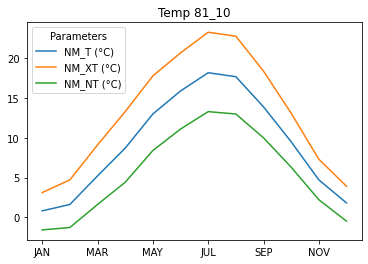

In [ ]:
list_temp = ["NM_T (°C)", "NM_XT (°C)", "NM_NT (°C)"]
dict_findel_df_ri['81_10'].loc[list_temp,:].T.plot(title = 'Temp 81_10')

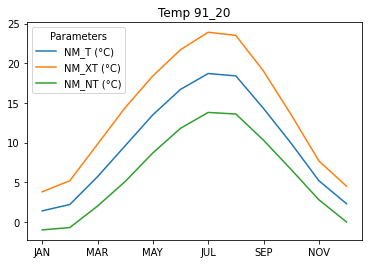

In [ ]:
dict_findel_df_ri['91_20'].loc[list_temp,:].T.plot(title = 'Temp 91_20')

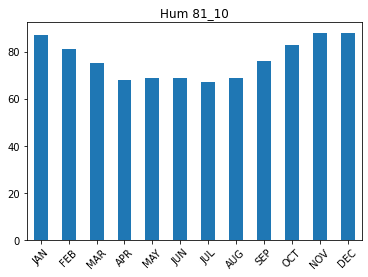

In [ ]:
dict_findel_df_ri['81_10'].loc['NM_U (%)'].plot(kind='bar',title = 'Hum 81_10',rot=45)

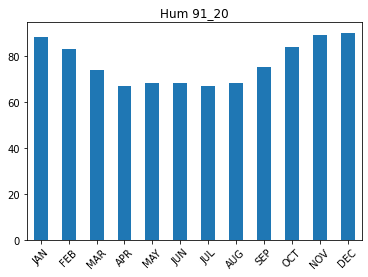

In [ ]:
dict_findel_df_ri['91_20'].loc['NM_U (%)'].plot(kind='bar',title = 'Hum 91_20',rot=45)

## Find quarterly (3 month wise) differences of the parameters between 81-10 vs 91-20

In [ ]:
diff_df = dict_findel_df_ri['91_20'].subtract(dict_findel_df_ri['81_10'])/((dict_findel_df_ri['81_10']+dict_findel_df_ri['91_20'])/2)
diff_df = diff_df.fillna(0)
diff_df_q = diff_df.groupby(pd.PeriodIndex(diff_df.columns, freq='Q'), axis=1).mean()

print('https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases')

diff_df_q
(dict_findel_df_ri['81_10']+dict_findel_df_ri['91_20'])/2

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Parameters,,,,,,,,,,,,
NM_T (°C),1.10,1.90,5.45,9.15,13.25,16.30,18.45,18.05,14.10,9.70,4.95,2.05
NM_XT (°C),3.45,4.95,9.45,13.85,18.10,21.20,23.60,23.15,18.70,13.30,7.50,4.20
NM_NT (°C),-1.30,-1.00,1.80,4.75,8.55,11.45,13.55,13.30,10.15,6.45,2.50,-0.25
NM_RR06_06 (mm),74.05,61.00,62.85,53.80,75.90,76.45,71.55,73.65,71.45,81.50,73.85,88.10
NM_INS (hours),51.15,81.55,131.10,189.55,219.85,234.10,253.95,233.95,168.40,106.30,52.65,41.45
NM_U (%),87.50,82.00,74.50,67.50,68.50,68.50,67.00,68.50,75.50,83.50,88.50,89.00
NM_QFF (hPa),1019.80,1018.40,1016.40,1014.70,1015.20,1016.30,1016.50,1015.90,1016.40,1016.50,1016.40,1017.60
NM_ODRR01 (days),17.15,14.85,15.45,13.20,14.20,13.60,13.35,13.15,12.60,15.30,17.35,17.50
NM_OFOG (days),10.85,7.25,4.55,2.20,2.30,1.70,1.40,2.20,4.05,8.40,11.05,11.70


## Write codes to check the following statements if they are True or False

### Quarterly mean temperature is not affected by climate change

In [ ]:
diff_df_q.loc['NM_T (°C)'] == 0

1Q1    False
1Q2    False
1Q3    False
1Q4    False
Freq: Q-DEC, Name: NM_T (°C), dtype: bool

### Fog is decreasing in the winter months (Dec-Mar) between decades

In [ ]:
diff_df.loc['NM_OFOG (days)'][['DEC','JAN','FEB','MAR']] < 0

DEC    True
JAN    True
FEB    True
MAR    True
Name: NM_OFOG (days), dtype: bool

### Precipitation (rain) pattern is changing between decades

In [ ]:
diff_df_q.loc[['NM_RR06_06 (mm)','NM_ODRR01 (days)'],:].T.style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

Parameters,NM_RR06_06 (mm),NM_ODRR01 (days)
1Q1,-0.105646,0.002475
1Q2,-0.107445,-0.049348
1Q3,-0.055969,-0.001151
1Q4,-0.052168,0.024264


In [ ]:
diff_df.loc[['NM_RR06_06 (mm)','NM_ODRR01 (days)'],:].T.style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

Parameters,NM_RR06_06 (mm),NM_ODRR01 (days)
JAN,-0.068872,0.017493
FEB,-0.049180,0.074074
MAR,-0.198886,-0.084142
APR,-0.163569,-0.075758
MAY,-0.068511,-0.028169
JUN,-0.090255,-0.044118
JUL,0.015374,0.052434
AUG,-0.047522,0.007605
SEP,-0.135759,-0.063492
OCT,-0.130061,-0.013072


## Find out the three most changed parameters and three least changed parameters in the quarterly (3 month wise) differences

In [ ]:
diff_q_sorted = diff_df_q.abs().mean(axis=1).sort_values()
print("\nLeast changed\n", diff_q_sorted[0:3])

print("\nMost changed\n",diff_q_sorted[-3:])


Least changed
 Parameters
NM_QFF (hPa)        0.000000
NM_U (%)            0.011667
NM_ODRR01 (days)    0.019309
dtype: float64

Most changed
 Parameters
NM_ODNT0 (days)     0.260450
NM_ODXT30 (days)    0.277052
NM_ODXT25 (days)    0.287582
dtype: float64


In [ ]:
diff_q_sorted[-3:].index

Index(['NM_ODNT0 (days)', 'NM_ODXT30 (days)', 'NM_ODXT25 (days)'], dtype='object', name='Parameters')

## Is there any correlation between the most changed parameters

In [ ]:
diff_df.loc[diff_q_sorted[-3:].index].T.corr().style.bar(color=['#d65f5f', '#5fba7d'],axis=1,align='mid')

Parameters,NM_ODNT0 (days),NM_ODXT30 (days),NM_ODXT25 (days)
Parameters,,,
NM_ODNT0 (days),1.000000,-0.757288,0.010369
NM_ODXT30 (days),-0.757288,1.000000,-0.101321
NM_ODXT25 (days),0.010369,-0.101321,1.000000


In [ ]:
diff_df_q.loc[diff_q_sorted[-3:].index].T.corr().style.bar(color=['#d65f5f', '#5fba7d'],axis=1,align='mid')

Parameters,NM_ODNT0 (days),NM_ODXT30 (days),NM_ODXT25 (days)
Parameters,,,
NM_ODNT0 (days),1.000000,-0.945879,-0.163625
NM_ODXT30 (days),-0.945879,1.000000,0.014940
NM_ODXT25 (days),-0.163625,0.014940,1.000000


## Create a common dataframe (df_temp_81_20) with only month-wise mean temperature and precipitation taken from both 81-10 vs 91-20 dataframes, now the month will be the row-index. 



In [ ]:
part_1 = dict_findel_df_ri['81_10'].T[['NM_T (°C)', 'NM_RR06_06 (mm)']] # Temperature and mean from 81_10
part_2 = dict_findel_df_ri['91_20'].T[['NM_T (°C)', 'NM_RR06_06 (mm)']] # Temperature and mean from 91_20
df_temp_81_20 = pd.merge(part_1, part_2, left_index=True, right_index=True, suffixes=('_81_10', '_91_20'))
df_temp_81_20

Parameters,NM_T (°C)_81_10,NM_RR06_06 (mm)_81_10,NM_T (°C)_91_20,NM_RR06_06 (mm)_91_20
JAN,0.8,76.6,1.4,71.5
FEB,1.6,62.5,2.2,59.5
MAR,5.2,69.1,5.7,56.6
APR,8.7,58.2,9.6,49.4
MAY,13.0,78.5,13.5,73.3
JUN,15.9,79.9,16.7,73.0
JUL,18.2,71.0,18.7,72.1
AUG,17.7,75.4,18.4,71.9
SEP,13.9,76.3,14.3,66.6
OCT,9.5,86.8,9.9,76.2


## Create a visualisation where the monthly mean temperature can be compared between 81-10 and 91-20

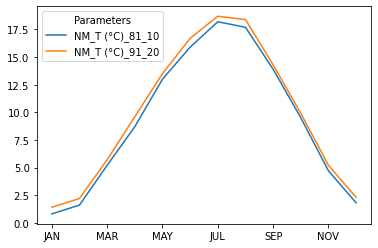

In [ ]:
df_temp_81_20[['NM_T (°C)_81_10','NM_T (°C)_91_20']].plot()

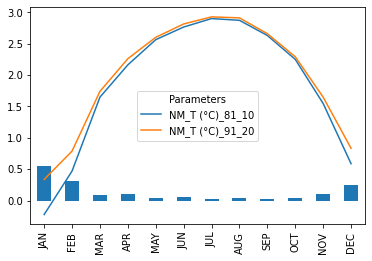

In [ ]:
import numpy as np

pxd = np.log(df_temp_81_20[['NM_T (°C)_81_10','NM_T (°C)_91_20']]).plot()
diff_df.T['NM_T (°C)'].plot.bar(x=pxd)
pxd